# EDA Done By Shwetank Kumar


# Data Set Information:

###### The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
###### 122 instances for each region.
###### The period from June 2012 to September 2012.
###### The dataset includes 11 attribues and 1 output attribue (class)
###### The 2m44 instances have been classified into fire and notfire classes


# Attribute Information:


##### 1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
##### Weather data observations
##### 2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
##### 3. RH : Relative Humidity in %: 21 to 90
##### 4. Ws :Wind speed in km/h: 6 to 29
##### 5. Rain: total day in mm: 0 to 16.8
##### FWI Components
##### 6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
##### 7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
##### 8. Drought Code (DC) index from the FWI system: 7 to 220.4
##### 9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
##### 10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
##### 11. Fire Weather Index (FWI) Index: 0 to 31.1
##### 12. Classes: two classes, namely fire and notfire

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as plotly
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
241  6.5       fire     
242    0   not fire     
243  0.2   not fire     
244  0.7   not fire     
245  0.5  not fire      

[246 rows x 14 columns]

### 1) Data Cleaning

In [3]:
df[121:].head(4)

day  month  year  Temperature   RH   Ws  Rain   \
121                             30     09  2012           25   78   14    1.4   
122  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
123                            day  month  year  Temperature   RH   Ws  Rain    
124                             01     06  2012           32   71   12    0.7   

     FFMC  DMC   DC  ISI  BUI  FWI    Classes    
121    45  1.9  7.5  0.2  2.4  0.1  not fire     
122   NaN  NaN  NaN  NaN  NaN  NaN          NaN  
123  FFMC  DMC   DC  ISI  BUI  FWI    Classes    
124  57.1  2.5  8.2  0.6  2.8  0.2  not fire

In [4]:
#dropping rows which has no information
df.drop(index=[122,123],axis=0,inplace=True)
df.reset_index(inplace=True)
df.iloc[121:].head(10)

index day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  \
121    121  30    09  2012          25  78  14   1.4    45  1.9   7.5  0.2   
122    124  01    06  2012          32  71  12   0.7  57.1  2.5   8.2  0.6   
123    125  02    06  2012          30  73  13     4  55.7  2.7   7.8  0.6   
124    126  03    06  2012          29  80  14     2  48.7  2.2   7.6  0.3   
125    127  04    06  2012          30  64  14     0  79.4  5.2  15.4  2.2   
126    128  05    06  2012          32  60  14   0.2  77.1    6  17.6  1.8   
127    129  06    06  2012          35  54  11   0.1  83.7  8.4  26.3  3.1   
128    130  07    06  2012          35  44  17   0.2  85.6  9.9  28.9  5.4   
129    131  08    06  2012          28  51  17   1.3  71.4  7.7   7.4  1.5   
130    132  09    06  2012          27  59  18   0.1  78.1  8.5  14.7  2.4   

      BUI  FWI    Classes    
121   2.4  0.1  not fire     
122   2.8  0.2  not fire     
123   2.9  0.2  not fire     
124   2.6  0.1  not fire     
125   5.6    1  not fire     
126   6.5  0.9  not fire     
127   9.3  3.1      fire     
128  10.7    6      fire     
129   7.3  0.8  not fire     
130   8.3  1.9  not fire

In [5]:
df.drop('index',axis=1,inplace=True)
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
239  6.5       fire     
240    0   not fire     
241  0.2   not fire     
242  0.7   not fire     
243  0.5  not fire      

[244 rows x 14 columns]

In [6]:
# adding 2 region as per the given dataset
df.loc[0:121,'Region']='Bejaia'  # 121 is inclusive unlike in iloc


In [7]:
df.loc[122:,'Region']='Sidi-Bel Abbes'

In [8]:
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
239  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
240  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
241  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
242  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
243  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes            Region  
0    0.5   not fire             Bejaia  
1    0.4   not fire             Bejaia  
2    0.1   not fire             Bejaia  
3      0   not fire             Bejaia  
4    0.5   not fire             Bejaia  
..   ...           ...             ...  
239  6.5       fire     Sidi-Bel Abbes  
240    0   not fire     Sidi-Bel Abbes  
241  0.2   not fire     Sidi-Bel Abbes  
242  0.7   not fire     Sidi-Bel Abbes  
243  0.5  not fire      Sidi-Bel Abbes  

[244 rows x 15 columns]

In [9]:
df.head(1)

day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4  7.6  1.3  3.4  0.5   

     Classes    Region  
0  not fire     Bejaia

In [10]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [12]:
df.columns=[col.strip() for col in df.columns]

In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('------------------------------------------------------------------------')
    print()

day
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']
------------------------------------------------------------------------

month
['06' '07' '08' '09']
------------------------------------------------------------------------

year
['2012']
------------------------------------------------------------------------

Temperature
['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' '38' '39' '40' '42']
------------------------------------------------------------------------

RH
['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' '44' '41' '42'
 '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33' '35' '39'
 '31' '21' '40' '24' '38' '26']
----------------------------------------------------------------------

In [15]:
# from above code it can be seen that that datapoints in some features are not proper
# FWI has fire as datapoints and also some values in other features have unwanted spaces (class data)
df=df.astype(str)

In [16]:
for col in df.columns:
    df[col]=df[col].str.replace(" ","")

In [17]:
#checking one of the cleaned columns
df['Classes'].value_counts()

fire       137
notfire    106
nan          1
Name: Classes, dtype: int64

In [18]:
df[df['FWI']=='fire']

day month  year Temperature  RH  Ws Rain  FFMC   DMC     DC   ISI   BUI  \
165  14    07  2012          37  37  18  0.2  88.9  12.9  14.69  12.5  10.4   

      FWI Classes         Region  
165  fire     nan  Sidi-BelAbbes

In [19]:
# get the index for columns FWI where datapoint is Fire
df[df['FWI']=='fire'].index

Int64Index([165], dtype='int64')

In [20]:
df['FWI'].value_counts()

0.4     12
0.8     10
0.5      9
0        9
0.1      9
        ..
fire     1
8.4      1
3.4      1
3.6      1
17.5     1
Name: FWI, Length: 126, dtype: int64

In [21]:
# replacing fire with most occuring value in FWI column 
# replacing nan with fire value 
df.loc[165,'FWI']='0.4'
df.loc[165,'Classes']='fire'

In [22]:
df.isnull().sum()  # now no data is missing

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [23]:
# convert features datatypes to its appropriate datatypes
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region         object
dtype: object

In [24]:
df.head(5)

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

   Classes  Region  
0  notfire  Bejaia  
1  notfire  Bejaia  
2  notfire  Bejaia  
3  notfire  Bejaia  
4  notfire  Bejaia

In [25]:
datatypes={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64','Ws':'int64','Rain':'float64','FFMC':'float64','DMC':'float64','DC':'float64','ISI':'float64','BUI':'float64','FWI':'float64'}
df=df.astype(datatypes)

In [26]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

# 2) EDA

In [27]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5  notfire  Bejaia  
1  0.4  notfire  Bejaia  
2  0.1  notfire  Bejaia  
3  0.0  notfire  Bejaia  
4  0.5  notfire  Bejaia

In [28]:
df.describe().T.style.background_gradient(cmap = "jet")

In [29]:
df_num=[col for col in df.columns if df[col].dtypes=='int64' or df[col].dtypes=='float64']
df_cat=[col for col in df.columns if df[col].dtypes=='object']


In [30]:
df_num_filtered=round(df[[col for col in df_num if col not in ['day','year','month','Region']]].corr(),2)

In [31]:
df_num_filtered

Temperature    RH    Ws  Rain  FFMC   DMC    DC   ISI   BUI   FWI
Temperature         1.00 -0.65 -0.28 -0.33  0.68  0.48  0.37  0.61  0.46  0.56
RH                 -0.65  1.00  0.24  0.22 -0.65 -0.41 -0.22 -0.69 -0.35 -0.57
Ws                 -0.28  0.24  1.00  0.17 -0.16 -0.00  0.08  0.02  0.03  0.03
Rain               -0.33  0.22  0.17  1.00 -0.54 -0.29 -0.30 -0.35 -0.30 -0.32
FFMC                0.68 -0.65 -0.16 -0.54  1.00  0.60  0.50  0.74  0.59  0.69
DMC                 0.48 -0.41 -0.00 -0.29  0.60  1.00  0.88  0.67  0.98  0.87
DC                  0.37 -0.22  0.08 -0.30  0.50  0.88  1.00  0.50  0.94  0.74
ISI                 0.61 -0.69  0.02 -0.35  0.74  0.67  0.50  1.00  0.64  0.91
BUI                 0.46 -0.35  0.03 -0.30  0.59  0.98  0.94  0.64  1.00  0.86
FWI                 0.56 -0.57  0.03 -0.32  0.69  0.87  0.74  0.91  0.86  1.00

<AxesSubplot:>

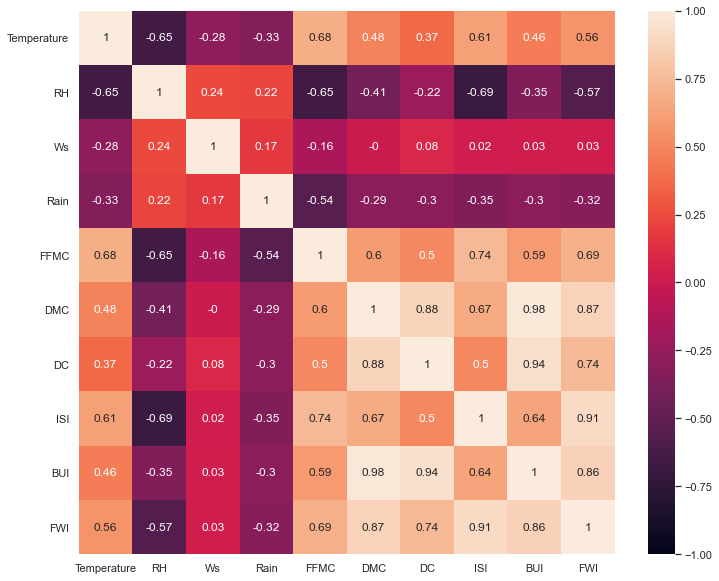

In [32]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data=df_num_filtered,annot=True,vmin=-1,vmax=1)

## Findings

#### DMC is highly correlated to BUI  (0.98)
#### DC is highly dependent on BUI  (0.94)
#### Then comes ISI which is correlated to FWI (0.91)
#### Then comes DMC which is correlated to DC (0.88)
#### Then comes FWI which is correlated to BUI (0.86)
#### We can drop one feature from each pair above

## Ctegorical Features with target 

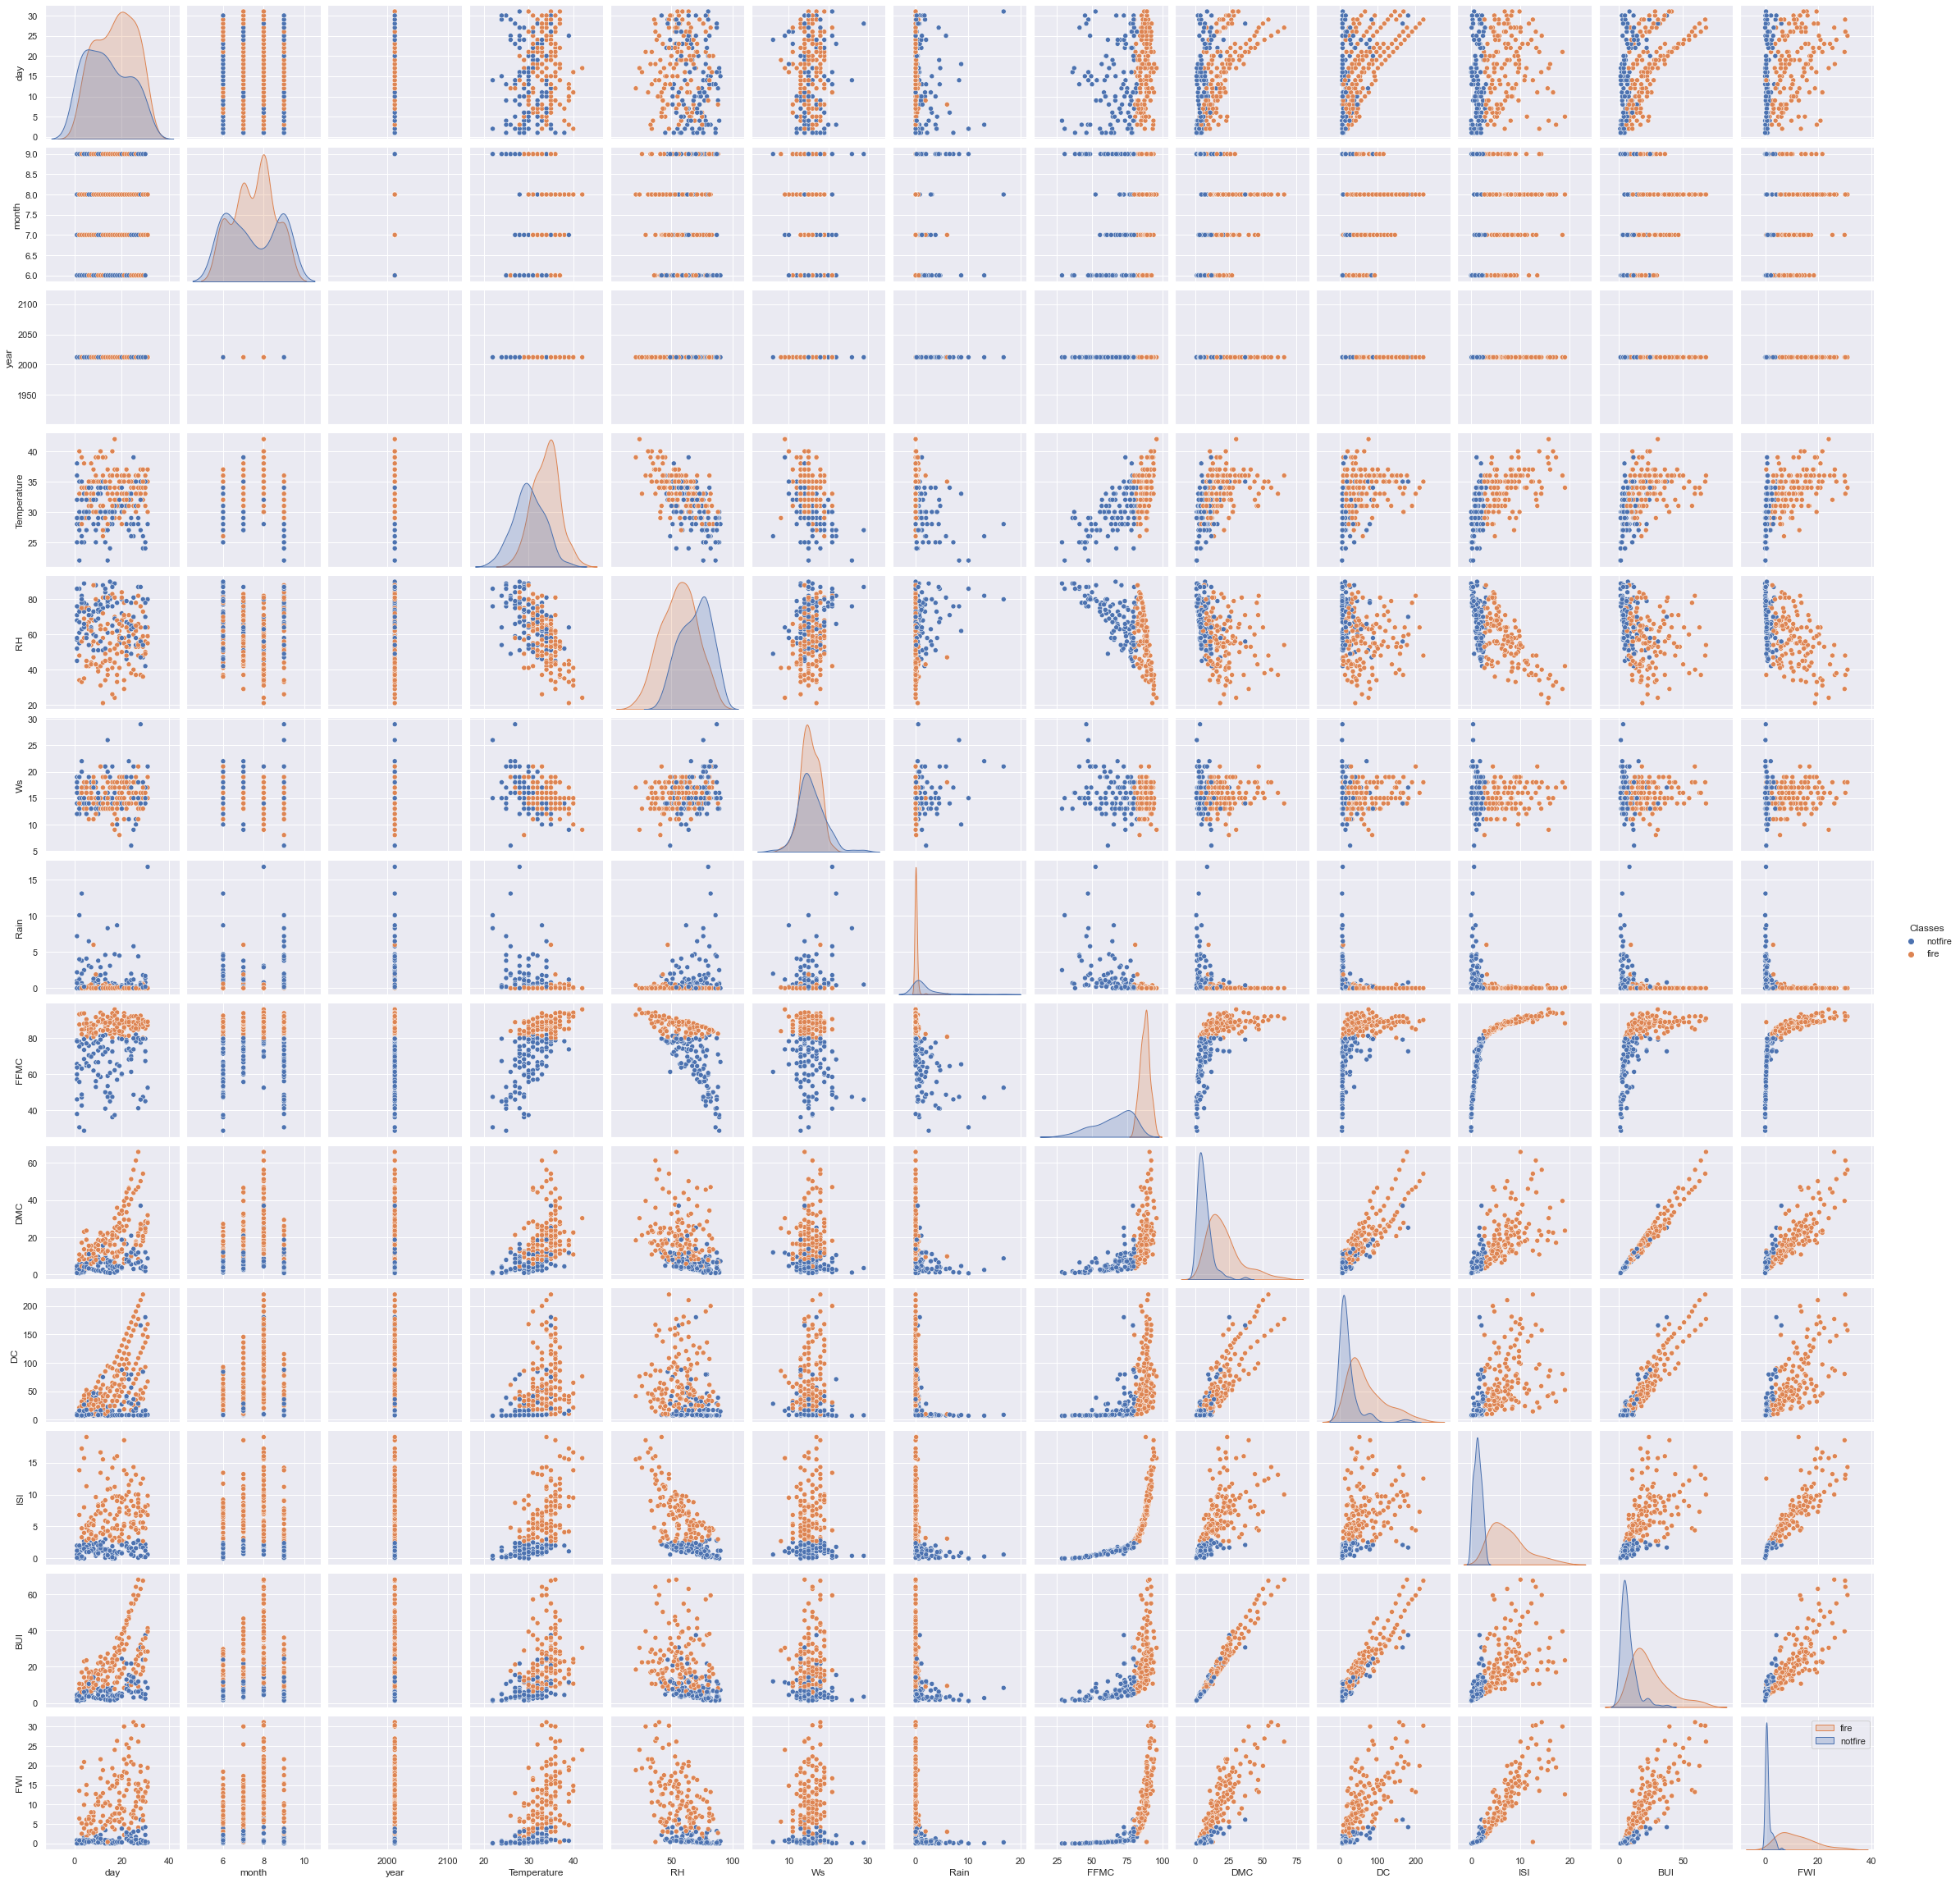

In [33]:
sns.pairplot(df,hue='Classes')
plt.legend(labels=['fire','notfire'])
plt.show()

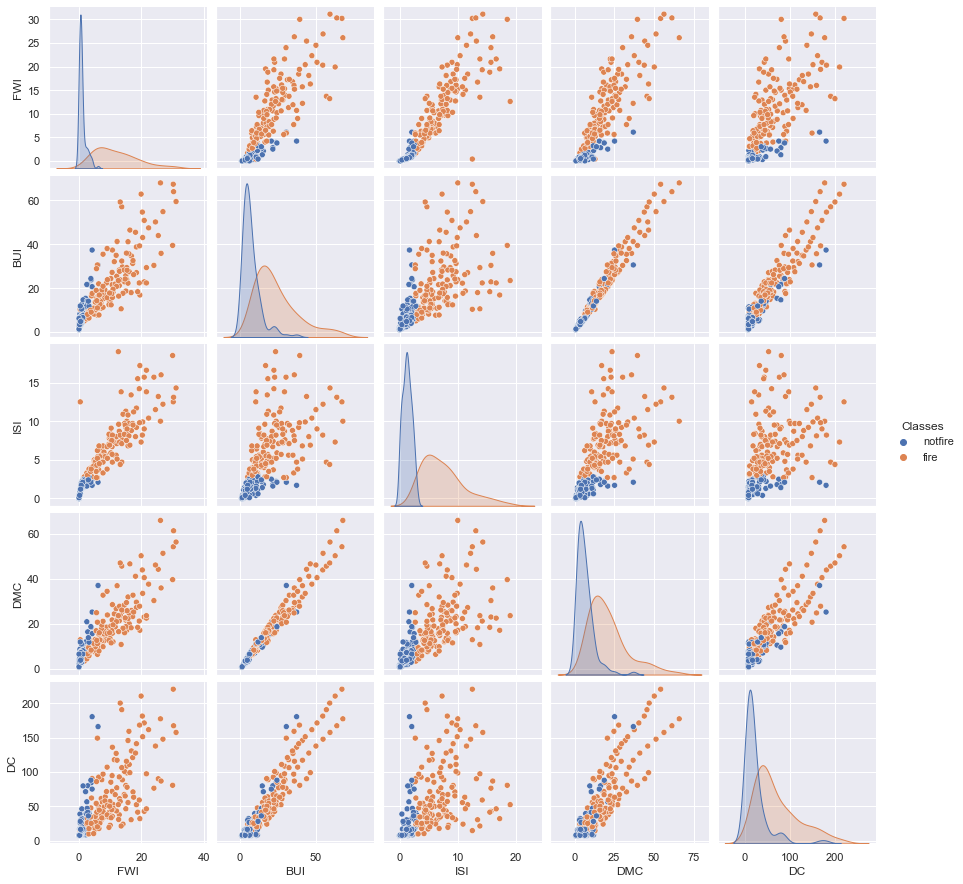

In [34]:
# top 5 correlated features pairplot
data=['FWI','BUI','ISI','DMC','DC','Classes']
sns.pairplot(df[data],hue='Classes')
plt.show()

## Findings
###### Feature ISI and FWI are linearly seperable and can separate class labels fire and notfire
###### easily compared to other features

#### Feature 'Region'

In [35]:
data1=df.groupby(['Region','Classes'])['Classes'].count().reset_index(name='fire count')
data1

Region  Classes  fire count
0         Bejaia     fire          59
1         Bejaia  notfire          63
2  Sidi-BelAbbes     fire          79
3  Sidi-BelAbbes  notfire          43

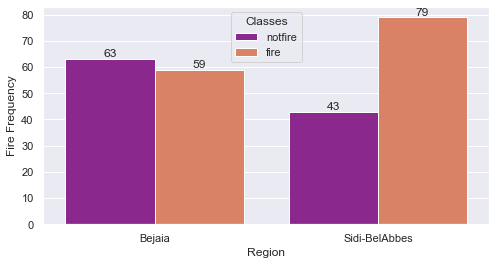

In [52]:
sns.set(rc={'figure.figsize':(8,4)})
ax=sns.countplot(data=df,x='Region',hue='Classes',palette="plasma")
plt.ylabel('Fire Frequency')
for container in ax.containers:
    ax.bar_label(container);

plt.show()

In [37]:
data2=df.groupby(['month','Classes'])['Classes'].count().reset_index(name='fire count').sort_values(by='fire count',ascending=False)
data2

month  Classes  fire count
4      8     fire          51
2      7     fire          39
7      9  notfire          37
1      6  notfire          35
0      6     fire          25
3      7  notfire          23
6      9     fire          23
5      8  notfire          11

In [38]:
data3=df[df['Classes']=='fire']

In [55]:
data4=data3.groupby(['month','Region'])['Classes'].count().reset_index(name='fire count').sort_values(by='fire count',ascending=False)
data4

month         Region  fire count
5      8  Sidi-BelAbbes          27
3      7  Sidi-BelAbbes          24
4      8         Bejaia          24
7      9  Sidi-BelAbbes          16
2      7         Bejaia          15
0      6         Bejaia          13
1      6  Sidi-BelAbbes          12
6      9         Bejaia           7

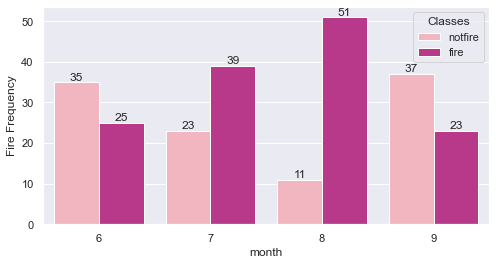

In [51]:
sns.set(rc={'figure.figsize':(8,4)})
ax=sns.countplot(data=df,x='month',hue='Classes',palette="RdPu")
plt.ylabel('Fire Frequency')
for container in ax.containers:
    ax.bar_label(container);

plt.show()

## Findings

#### 1)Fire took place more in Sidi-BelAbbes region than Bejaia region
#### 2) more forest fire has occured in month of August followed by july
#### 3) less forest fire was there in month september
#### 4) for both the region most fire count was in august
#### 4) for region Bejaia less fire count was in September and for Sidi-BelAbbes less fire count was 
####    in June

#### Feature 'Rain'

Text(0.5, 1.0, 'Rain received in each Region')

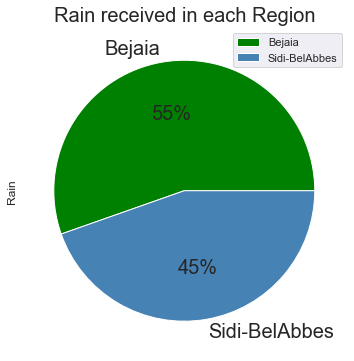

In [42]:
sns.set(rc={'figure.figsize':(8,6)})
df.groupby(['Region']).agg({'Rain':'sum'}).plot(kind='pie', y='Rain', autopct='%1.0f%%',
                                colors = ['green', 'steelblue'],fontsize=20)
plt.title("Rain received in each Region",fontsize = 20)

In [56]:
fig =px.sunburst(
    df,
    path=['Region','month'],
    values='Rain',
    color='Rain',color_continuous_scale='picnic')
fig.show()

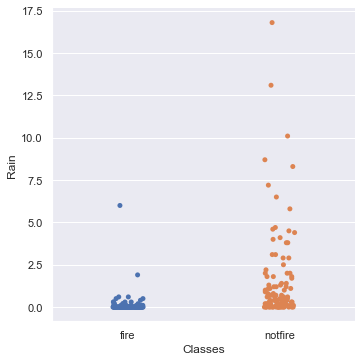

In [94]:
sns.catplot(data=df, x="Classes", y="Rain", order=["fire", "notfire"])

## Findings
###### Bejaia received 55 percent of rainfall and Sidi-BelAbbes has 45 % of rain
###### so with this we can say that that's why more fire incident was in Sidi-BelAbbes
###### for bejaia august has witnessed the highest rainfall with avg of 14.53 mm
###### for Sidi-BelAbbes June has witnessed the highest rainfall with avg of 4.41 mm
###### for bejaia july has witnessed the least rainfall with avg of 0.87 mm
###### for Sidi-BelAbbes August has witnessed the highest rainfall with avg of 2.26 mm
###### so with rain more than 6 mm fire doesnt occur

#### Feature 'Temperature' with 'Region'

In [43]:
df_B=df[df['Region']=='Bejaia']
df_B.groupby(['Region','month'])['Temperature'].max().reset_index(name='Max Temp').sort_values(by='Max Temp',ascending=False)

Region  month  Max Temp
2  Bejaia      8        37
1  Bejaia      7        36
0  Bejaia      6        34
3  Bejaia      9        33

In [44]:
df_S=df[df['Region']=='Sidi-BelAbbes']
df_S.groupby(['Region','month'])['Temperature'].max().reset_index(name='Max Temp').sort_values(by='Max Temp',ascending=False)

Region  month  Max Temp
2  Sidi-BelAbbes      8        42
1  Sidi-BelAbbes      7        39
0  Sidi-BelAbbes      6        37
3  Sidi-BelAbbes      9        36

In [45]:
# avg temp in each month by Region Name
import plotly.express as px
fig =px.sunburst(
    df,
    path=['Region','month'],
    values='Temperature',
    color='Temperature')
fig.show()

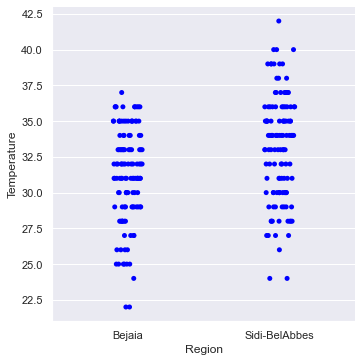

In [112]:
sns.catplot(data=df, x="Region", y="Temperature", order=["Bejaia", "Sidi-BelAbbes"],color='blue')

## Findings

#### 1) max temperature reached in bejaia region was 37 whereas max temperature reached in 
####    Sidi-BelAbbes region was 42
#### 2) August was the hottest month for both the region
#### 3) Soon after august september saw least temp in all 4 month
#### 4) range of temp in Sidi-BelAbbes > range of temp in bejaia

#### Feature 'Humidity' with 'Month'

In [47]:
df_S.groupby(['month'])['RH'].max()

month
6    90
7    87
8    81
9    88
Name: RH, dtype: int64

In [48]:
import plotly.express as px
data = dict(
    number=[90,88,87,81],
    stage=["June","September","July", "August"])
fig = px.funnel(data, x='number', y='stage',title='Maximum Humitidy value in Each Month for Sidi-BelAbbes',color='number')
fig.show()

In [49]:
df_B.groupby(['month'])['RH'].max()

month
6    89
7    81
8    82
9    88
Name: RH, dtype: int64

In [50]:
import plotly.express as px
data = dict(number=[89,88,82,81],stage=["June","September","August","July"])
fig = px.funnel(data, x='number', y='stage',title='Maximum Humitidy value in Each Month for Bejaia',
                color='number')
fig.show()

## Findings
##### for both region relative humidity was high in month June
##### regn bejaia has less humidity in month july and rgn Sidi-BelAbbes has less RH in month August

## Feature windspeed ws

In [84]:
d=pd.DataFrame(df.groupby(['month','Classes'])['Ws'].max())
d.reset_index(inplace=True)
d

month  Classes  Ws
0      6     fire  21
1      6  notfire  22
2      7     fire  19
3      7  notfire  22
4      8     fire  21
5      8  notfire  21
6      9     fire  19
7      9  notfire  29

In [75]:
fig =px.sunburst(
    d,
    path=['month','Classes'],
    values='Ws',
    color='Ws',color_continuous_scale='oranges')
fig.show()

<AxesSubplot:title={'center':'max windspeed in both region'}, xlabel='Region', ylabel='wind speed'>

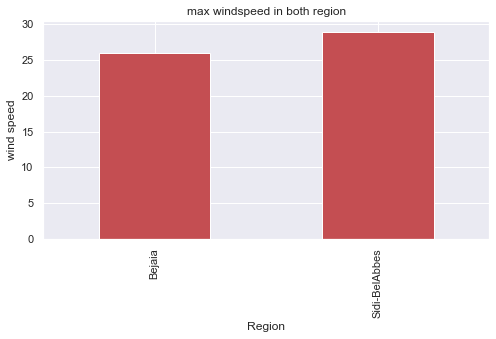

In [81]:
df.groupby(['Region'])['Ws'].max().plot(kind='bar',color='r',ylabel='wind speed',
                                        title='max windspeed in both region')

## Findings
###### ws was high in month september
###### maximum ws was recorded in Sidi-BelAbbes region
###### more will be windspeed more will be fire

In [99]:
df.head(1)

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC   DC  ISI  BUI  FWI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4  7.6  1.3  3.4  0.5   

   Classes  Region  
0  notfire  Bejaia

## Numerical Features 

In [106]:
df_n=df[[col for col in df if col not in ['day','year','month']]]
df_n.head(2) 

Temperature  RH  Ws  Rain  FFMC  DMC   DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4  7.6  1.3  3.4  0.5  notfire  Bejaia
1           29  61  13   1.3  64.4  4.1  7.6  1.0  3.9  0.4  notfire  Bejaia

In [109]:
df_fire=df_n[df_n['Classes']=='fire']
df_notfire=df_n[df_n['Classes']!='fire']

In [114]:
df_fire.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

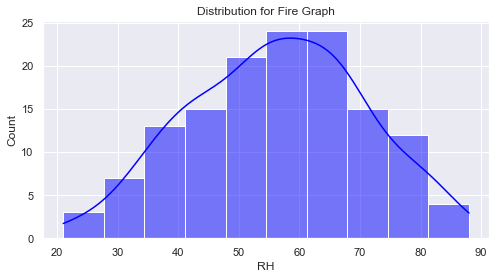

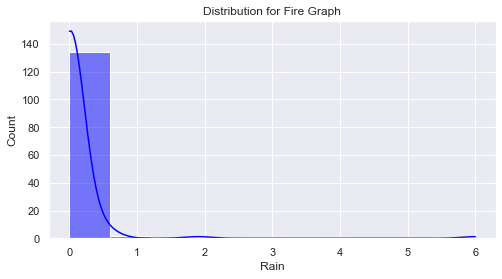

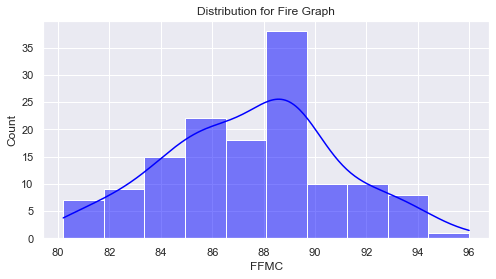

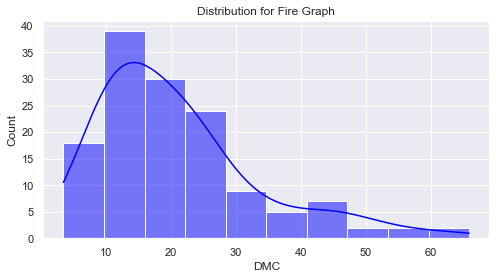

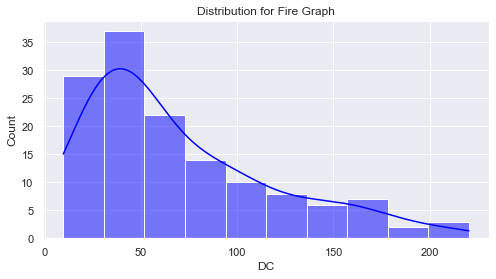

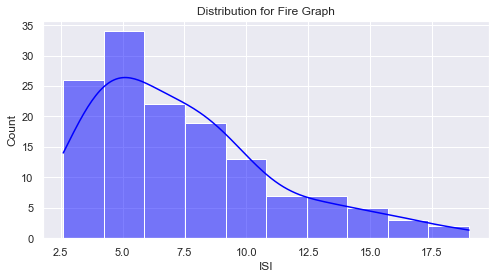

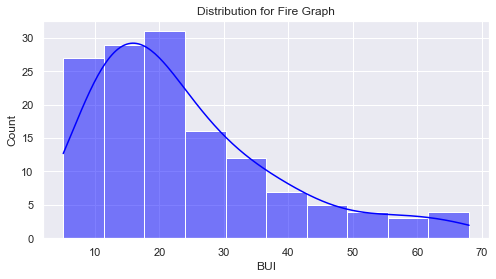

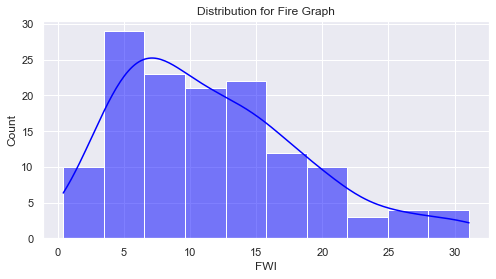

In [136]:
lst1=['RH','Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']
for i in lst1:
    sns.histplot(data=df_fire,x=i,kde=True,bins=10,color='blue')
    plt.title('Distribution for Fire Graph')
    plt.show()

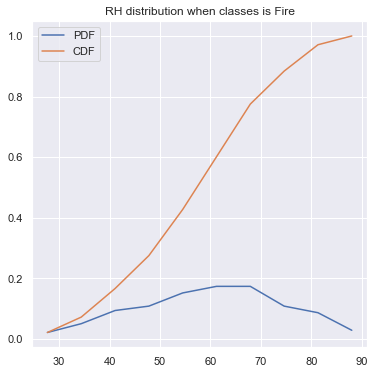

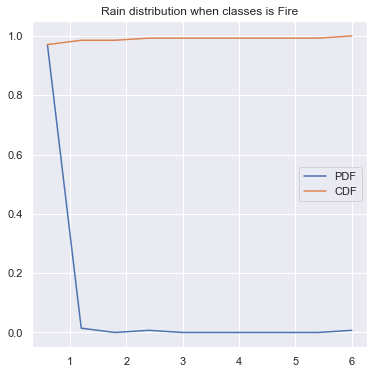

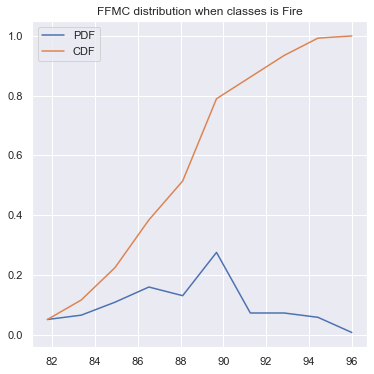

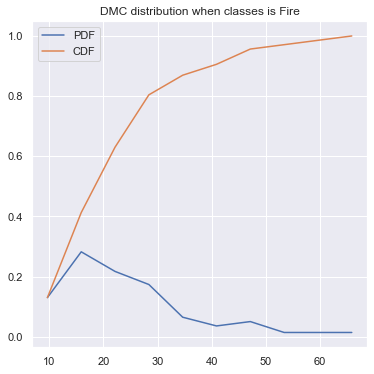

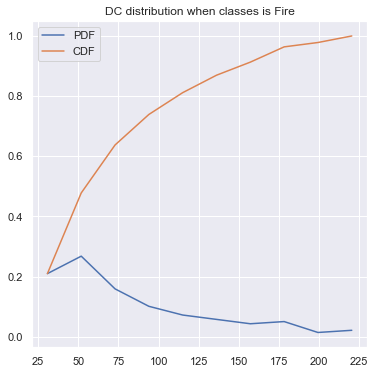

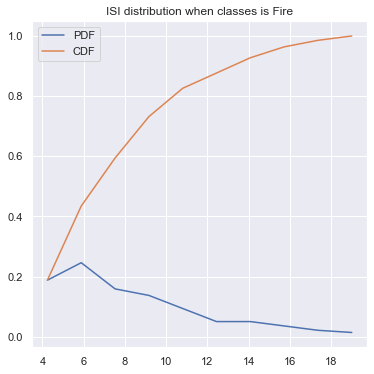

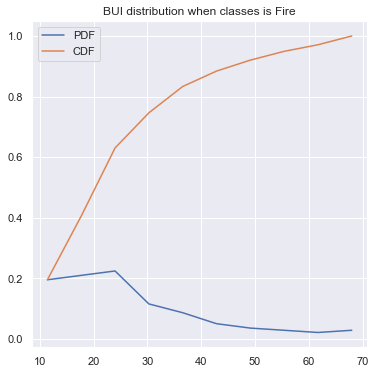

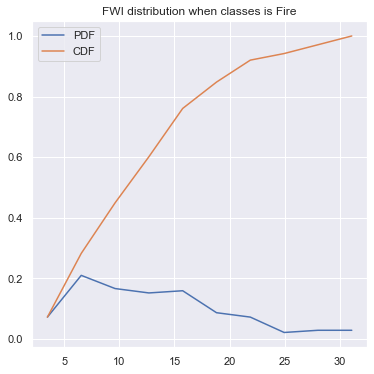

In [133]:
lst1=['RH','Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']
for i in lst1:
    plt.figure(figsize=(6,6))
    counts,bin_edges =np.histogram(df_fire[i],bins=10,density=True)
    pdf=counts/(sum(counts))
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label='PDF')
    plt.plot(bin_edges[1:],cdf,label='CDF')
    plt.title(i+" distribution when classes is Fire")
    plt.legend()

## Findings for class = fire
##### RH follows normal/gaussian distribution
##### Rain follows power law distribution (80 % of total rain has value btwm 0 to 1)
##### FFMC is left skewed 
##### DMC,ISI,BUI,DC,FWI all are follows log normal dist. (right skewed)
##### frm rain cdf graph we can conclude that almost 85 % of rainfall lies btwn 0 to 1 so fire took 
##### place more

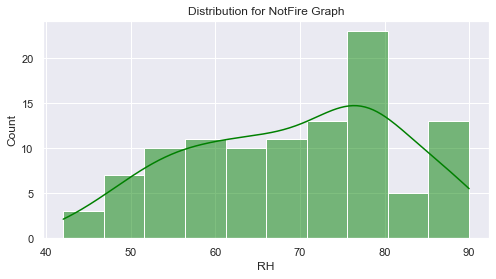

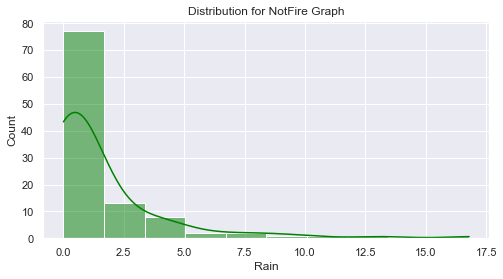

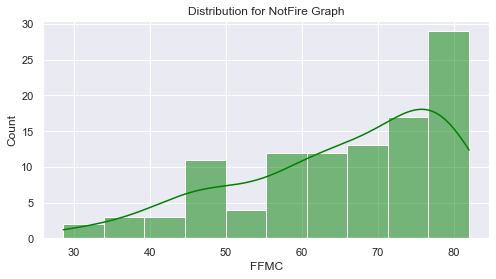

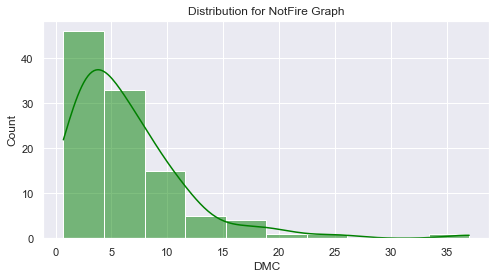

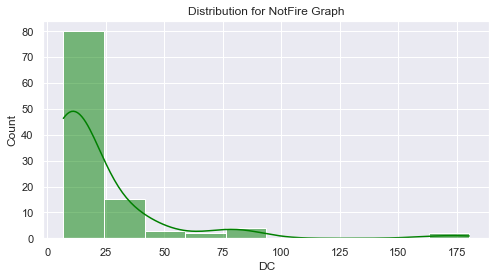

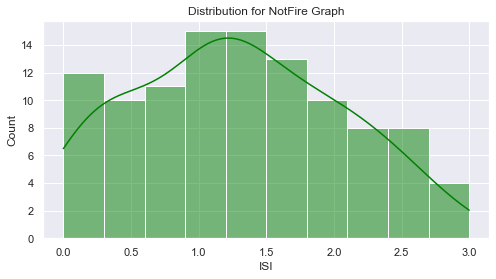

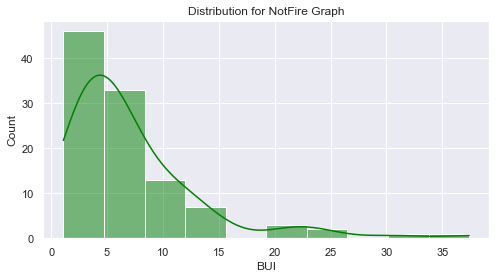

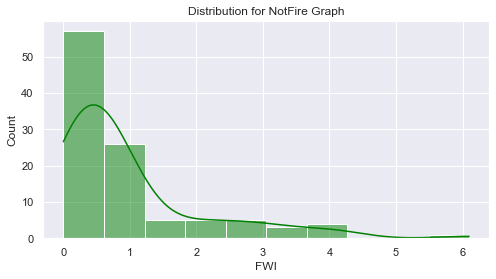

In [138]:
lst1=['RH','Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']
for i in lst1:
    sns.histplot(data=df_notfire,x=i,kde=True,bins=10,color='green')
    plt.title('Distribution for NotFire Graph')
    plt.show()

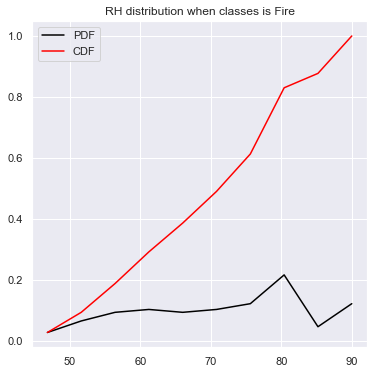

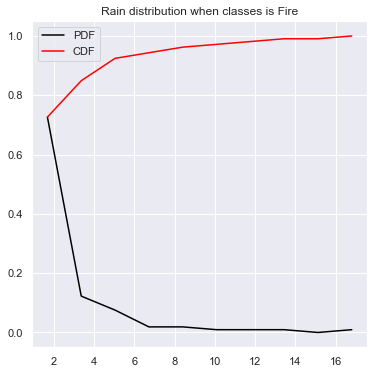

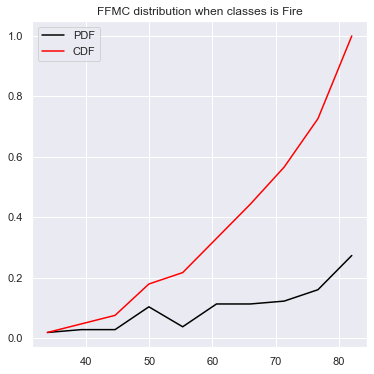

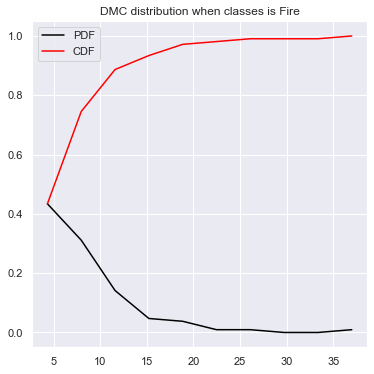

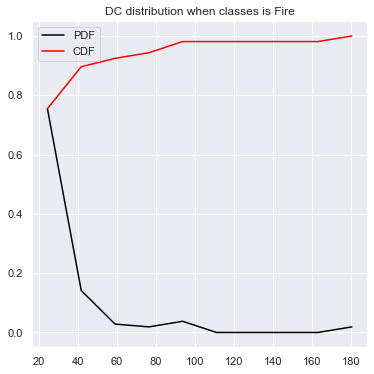

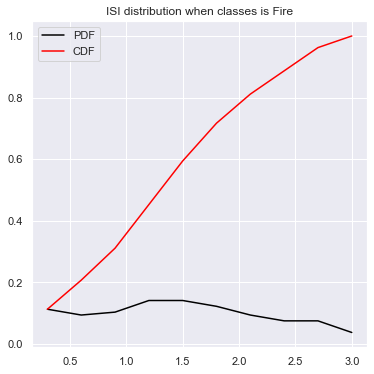

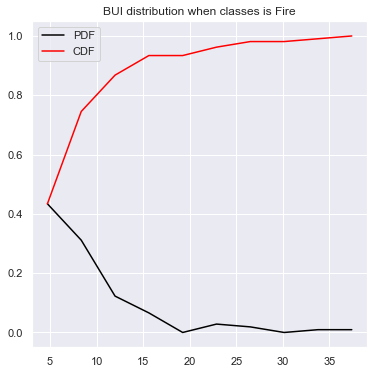

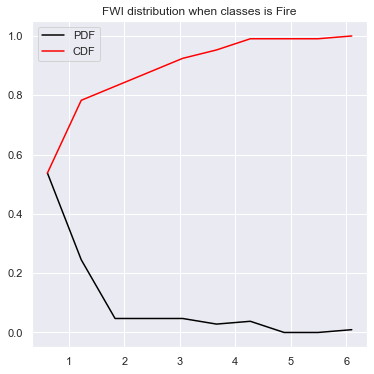

In [139]:
lst1=['RH','Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']
for i in lst1:
    plt.figure(figsize=(6,6))
    counts,bin_edges =np.histogram(df_notfire[i],bins=10,density=True)
    pdf=counts/(sum(counts))
    cdf=np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label='PDF',color='black')
    plt.plot(bin_edges[1:],cdf,label='CDF',color='red')
    plt.title(i+" distribution when classes is Fire")
    plt.legend()

# Findings for class = Notfire
#### RH and FFMC looks left skewed , more datapoints are towards left side (mean<median<mode)
#### Rain,DC follows power law distribution (pareto dist) with 80% values of total towrds 0 to 4 mm 
#### and 0 to 45 respectively
#### ISI,FWI,DMC,BUI are right skewed (mean>median>mode)

### Outliers 

In [145]:
df_new_n=df[[i for i in df_num if i not in ['day','month','year']]]
df_new_n

Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...
239           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5
240           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0
241           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2
242           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7
243           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5

[244 rows x 10 columns]

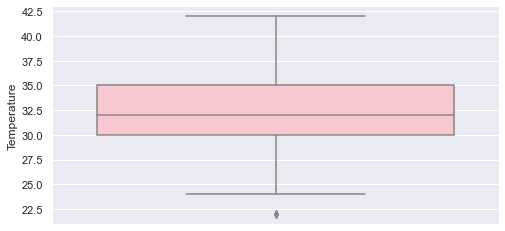

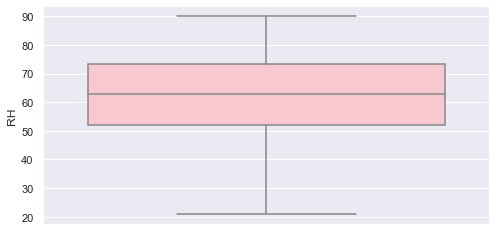

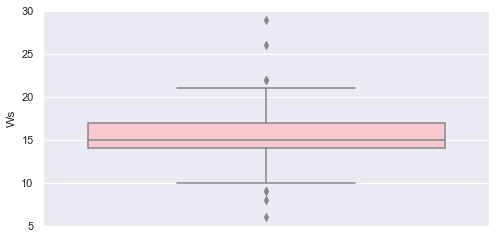

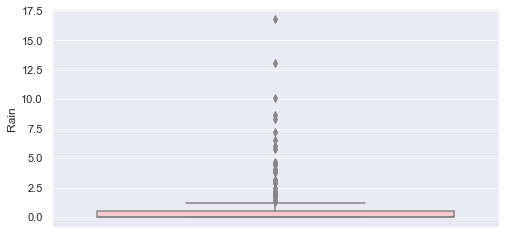

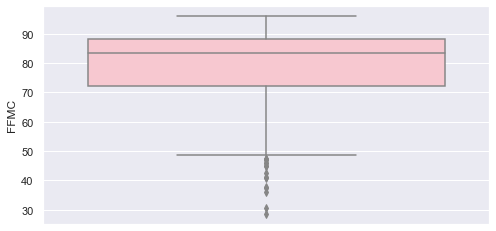

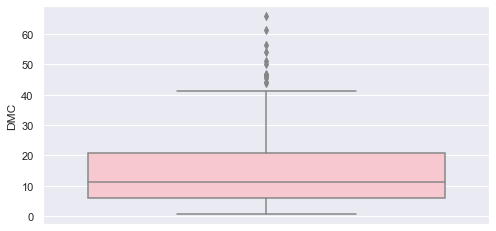

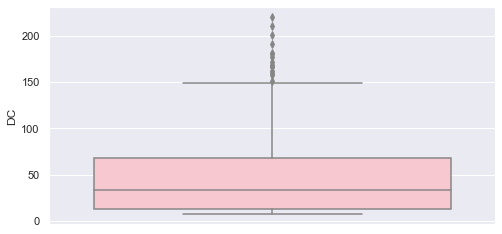

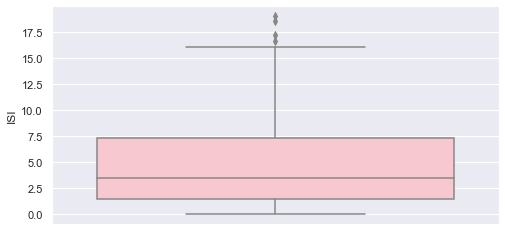

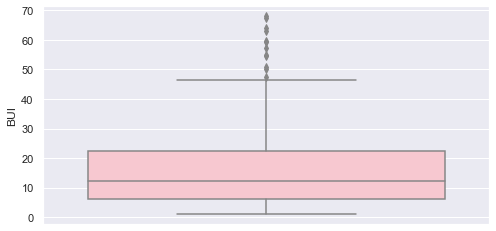

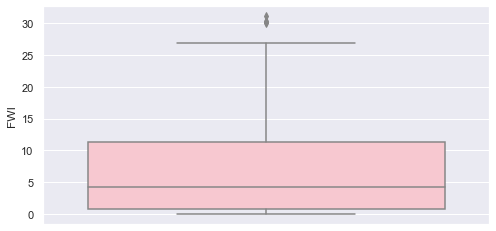

In [147]:
for attributes in df_new_n.columns:
    sns.boxplot(data=df_new_n,y=attributes,color='pink')
    plt.show()

## Findings
##### RH has no outliers
##### Temp has only 1 outliers , below left whisker
##### FFMC has lot of outliers below the left whisker
##### ws has outliers on both side of whiskers
##### Rain, FWI, ISI, DC, DMC are rightly skewed and hence outliers are more above upper fence
##### We may want to keep rain and ws as outliers because drastic amount of rain stops fire so it is
##### ri8 skewed and ws impacts both fire and notfire

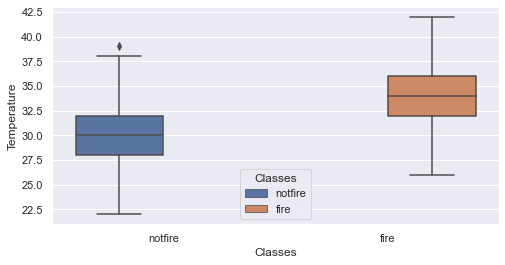

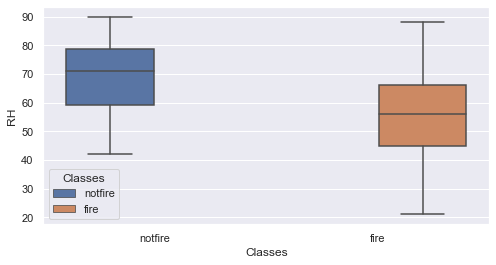

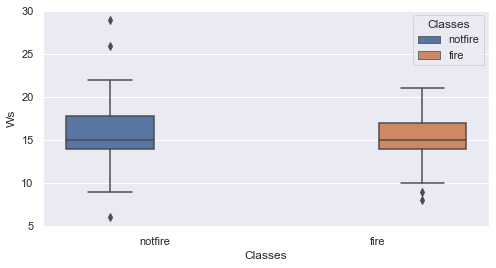

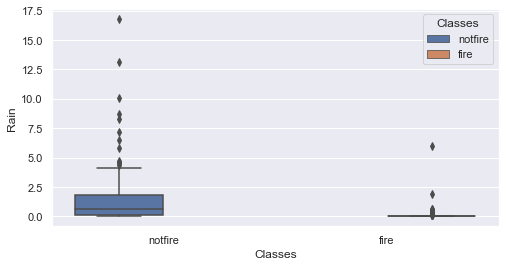

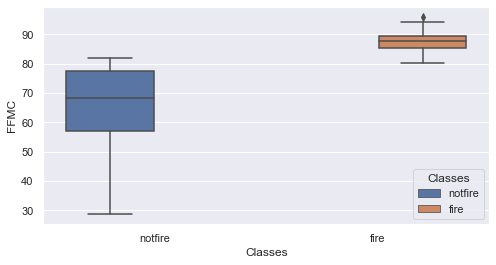

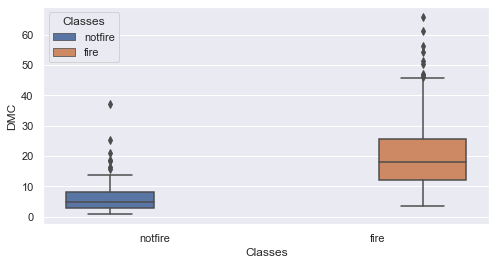

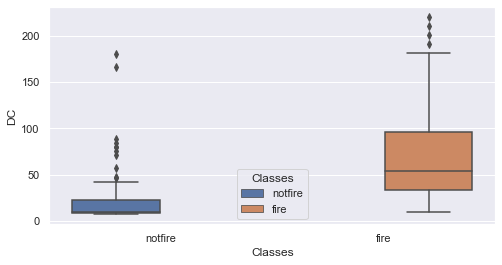

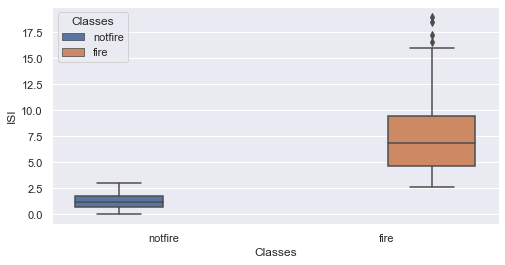

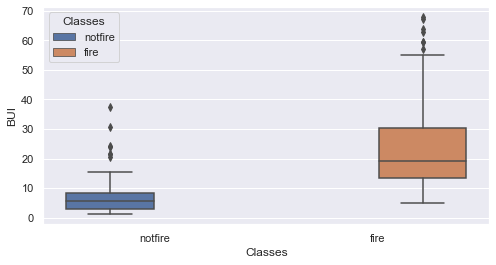

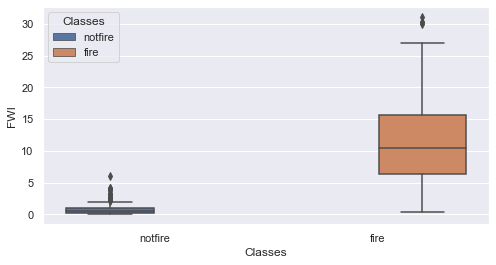

In [155]:
for attributes in df_new_n.columns:
    sns.boxplot(data=df_new_n,x=df['Classes'],y=attributes,hue=df['Classes'])
    plt.show()

## Findings
###### no outliers in temperature for fire class
###### range of RH more for fire class
###### in isi features outliers are only present in fire class and range of isi is very low for notfire

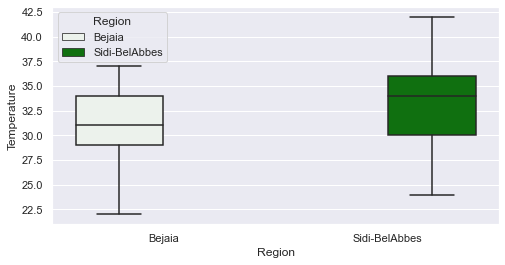

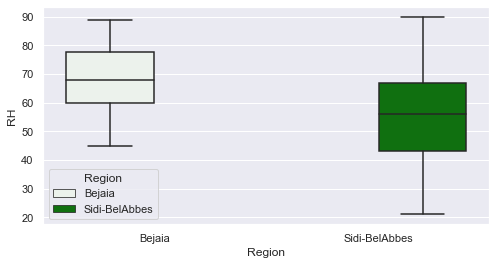

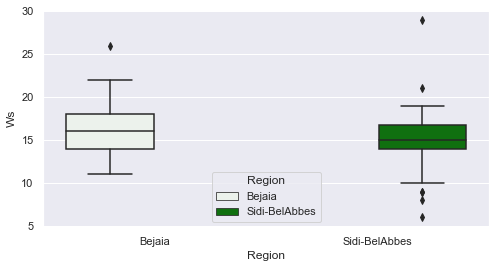

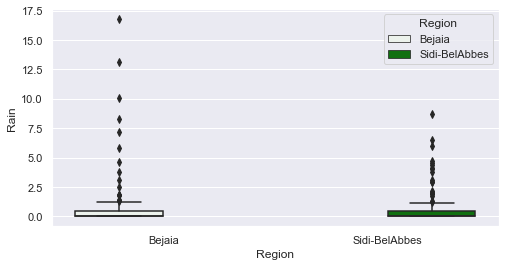

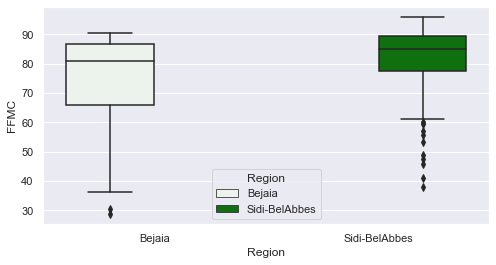

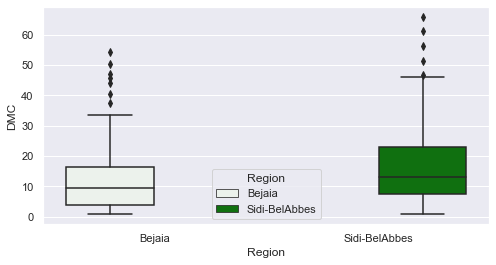

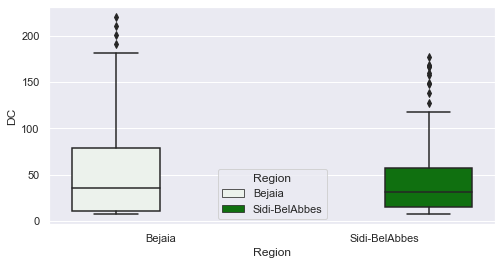

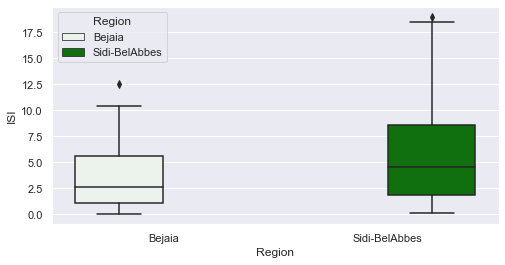

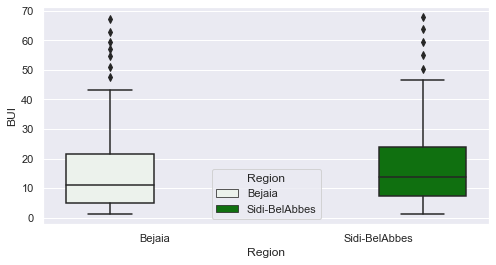

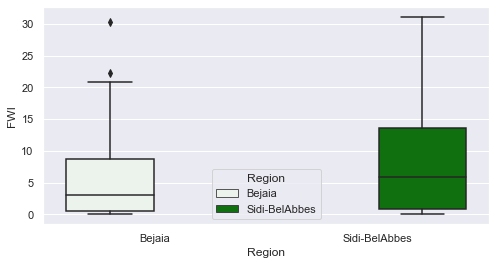

In [156]:
for attributes in df_new_n.columns:
    sns.boxplot(data=df_new_n,x=df['Region'],y=attributes,hue=df['Region'],color='green')
    plt.show()

## Findings
###### humidty range is more in Sidi-BelAbbes
###### wind speed range is more in bejaia
###### bajaia receives more precipitation , outliers in rain could result to less fire in bajaia

In [160]:
df_bej=df[df['Region']=='Bejaia']

Text(0.5, 1.0, 'Forest fire incident in Bejaia on each day')

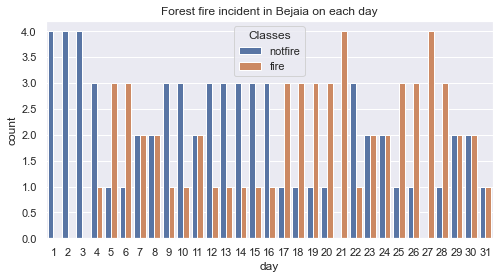

In [163]:
sns.countplot(data=df_bej,x='day',hue='Classes')
plt.title('Forest fire incident in Bejaia on each day')

In [164]:
df_Sidi=df[df['Region']!='Bejaia']

Text(0.5, 1.0, 'Forest fire incident in Sidi-BelAbbes on each day')

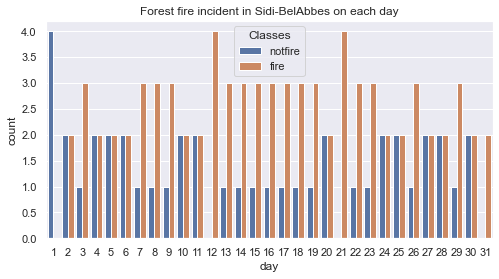

In [169]:
sns.countplot(data=df_Sidi,x='day',hue='Classes')
plt.title('Forest fire incident in Sidi-BelAbbes on each day')

## Findings
###### in bejaia on 21th and 27th most number of times fire event took place
###### in sidi-BelAbbes on 12th and 22th most number of times fire event took place

### FINAL REPORT
###### 1. very high Correlated features: DMC-BUI, DC-BUI, ISI-FWI
###### 2. high correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI 
###### 3. Temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.
###### 4. Wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.
###### 5. Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.
###### 6. For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.
###### 7. DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected
###### areas are more prone to forrest fires.
###### 8. In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.
###### 9. In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.
###### 10. Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.
###### 11. Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.
###### 12. July and august have more cases of fire as compared to no fire.
###### 13. June and september have more cases of no fire as compared to fire.
###### 14. Relative Humidity, RH feature doesnt have outliers whereas Temperature, FFMC, wind speed, Rain, DMC,DC, ISI, BUI and FWI have outilers.
###### 15. There is no null vales in dataset